In [98]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv(r"C:\Users\djbro\OneDrive\Desktop\The Analytics Edge\15-071-spring-2017\contents\logistic-regression\assignment-3\predicting-the-baseball-world-series-champion\baseball.csv")
df.head()


,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [99]:
null_counts = df.isna().sum()
null_counts

Team              0
League            0
Year              0
RS                0
RA                0
W                 0
OBP               0
SLG               0
BA                0
Playoffs          0
RankSeason      988
RankPlayoffs    988
G                 0
OOBP            812
OSLG            812
dtype: int64

In [100]:
df.fillna(0, inplace=True)
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,0.0,0.0,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,0.0,0.0,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,0.0,0.0,162,0.335,0.424


In [101]:
#df = df.drop(['state.abb','state.division'],axis =1)
#df

In [102]:
df.describe()

,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
count,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000
mean,1988.957792,715.081981,715.081981,80.904221,0.326331,0.397342,0.259273,0.198052,0.618506,0.538149,161.918831,0.113272,0.143094
std,14.819625,91.534294,93.079933,11.458139,0.015013,0.033267,0.012907,0.398693,1.465193,1.187604,0.624365,0.157815,0.199645
min,1962.000000,463.000000,472.000000,40.000000,0.277000,0.301000,0.214000,0.000000,0.000000,0.000000,158.000000,0.000000,0.000000
25%,1976.750000,652.000000,649.750000,73.000000,0.317000,0.375000,0.251000,0.000000,0.000000,0.000000,162.000000,0.000000,0.000000
50%,1989.000000,711.000000,709.000000,81.000000,0.326000,0.396000,0.260000,0.000000,0.000000,0.000000,162.000000,0.000000,0.000000
75%,2002.000000,775.000000,774.250000,89.000000,0.337000,0.421000,0.268000,0.000000,0.000000,0.000000,162.000000,0.322000,0.402000
max,2012.000000,1009.000000,1103.000000,116.000000,0.373000,0.491000,0.294000,1.000000,8.000000,5.000000,165.000000,0.384000,0.499000


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Team          1232 non-null   object 
 1   League        1232 non-null   object 
 2   Year          1232 non-null   int64  
 3   RS            1232 non-null   int64  
 4   RA            1232 non-null   int64  
 5   W             1232 non-null   int64  
 6   OBP           1232 non-null   float64
 7   SLG           1232 non-null   float64
 8   BA            1232 non-null   float64
 9   Playoffs      1232 non-null   int64  
 10  RankSeason    1232 non-null   float64
 11  RankPlayoffs  1232 non-null   float64
 12  G             1232 non-null   int64  
 13  OOBP          1232 non-null   float64
 14  OSLG          1232 non-null   float64
dtypes: float64(7), int64(6), object(2)
memory usage: 144.5+ KB


<AxesSubplot:xlabel='League'>

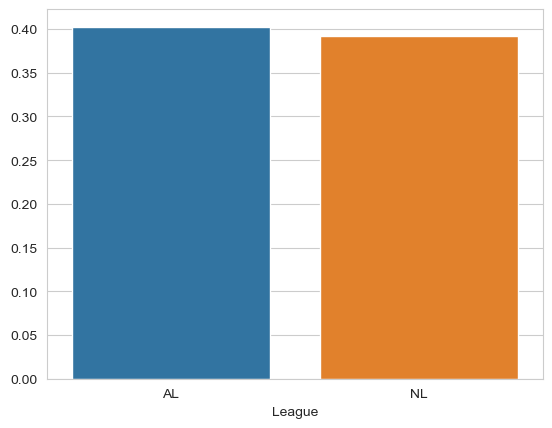

In [104]:
#Create dataframe grouped by League, find a difference in slugging percentage
df_League_wins = df.groupby('League')['SLG'].mean()

sns.barplot(x=df_League_wins.index,y=df_League_wins.values)

<AxesSubplot:xlabel='RS'>

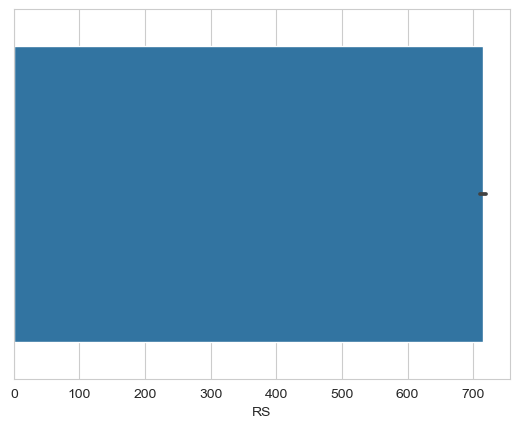

In [105]:
sns.barplot(data=df,x='RS')

<AxesSubplot:xlabel='Year'>

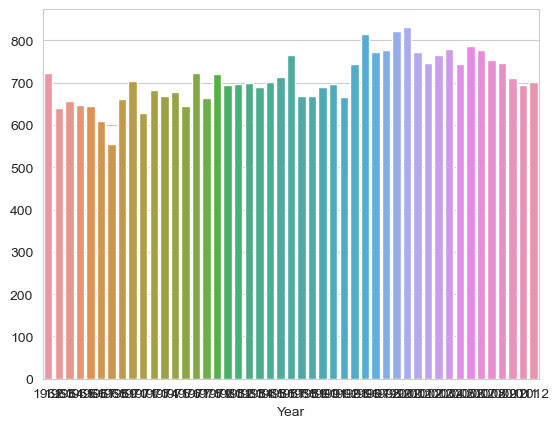

In [106]:
#Create dataframe grouped by runs scored by year
df_year_runs = df.groupby('Year')['RS'].mean()
df_year_runs

sns.barplot(x=df_year_runs.index,y=df_year_runs.values)

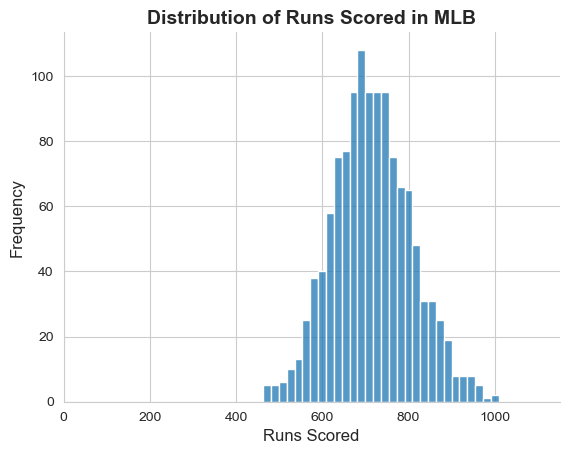

In [107]:
# set style to whitegrid
sns.set_style("whitegrid")

# Create a histogram of the runs scored
sns.histplot(df["RS"], kde=False, bins=30)

# Set x and y axis labels
plt.xlabel("Runs Scored", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Set title
plt.title("Distribution of Runs Scored in MLB", fontsize=14, fontweight='bold')

# Control x and y ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Control x and y limits
plt.xlim(0,1150)

# Control the color of the graph
sns.set_color_codes("dark")

# Remove top and right spines
sns.despine(top=True, right=True)

In [108]:
df.corr()

,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
Year,1.000000,0.418978,0.412020,0.004138,0.374354,0.536037,0.349397,0.145779,0.210074,0.210196,0.009287,0.798492,0.796450
RS,0.418978,1.000000,0.380139,0.511745,0.900492,0.918740,0.827000,0.386628,0.322912,0.386082,0.075195,0.352913,0.356366
RA,0.412020,0.380139,1.000000,-0.532394,0.326360,0.436527,0.330764,-0.261477,-0.144990,-0.191137,-0.023369,0.371361,0.381297
W,0.004138,0.511745,-0.532394,1.000000,0.481836,0.401496,0.408716,0.616757,0.441100,0.545605,0.105309,-0.017944,-0.022793
OBP,0.374354,0.900492,0.326360,0.481836,1.000000,0.790910,0.851958,0.363890,0.309576,0.361332,0.016563,0.289302,0.291663
SLG,0.536037,0.918740,0.436527,0.401496,0.790910,1.000000,0.790481,0.324713,0.301751,0.339276,0.036770,0.487125,0.490183
BA,0.349397,0.827000,0.330764,0.408716,0.851958,0.790481,1.000000,0.290217,0.253786,0.279295,0.019886,0.248489,0.251847
Playoffs,0.145779,0.386628,-0.261477,0.616757,0.363890,0.324713,0.290217,1.000000,0.849786,0.912202,0.022208,0.116232,0.113508
RankSeason,0.210074,0.322912,-0.144990,0.441100,0.309576,0.301751,0.253786,0.849786,1.000000,0.832824,0.035387,0.167293,0.164282
RankPlayoffs,0.210196,0.386082,-0.191137,0.545605,0.361332,0.339276,0.279295,0.912202,0.832824,1.000000,0.021708,0.176398,0.173748


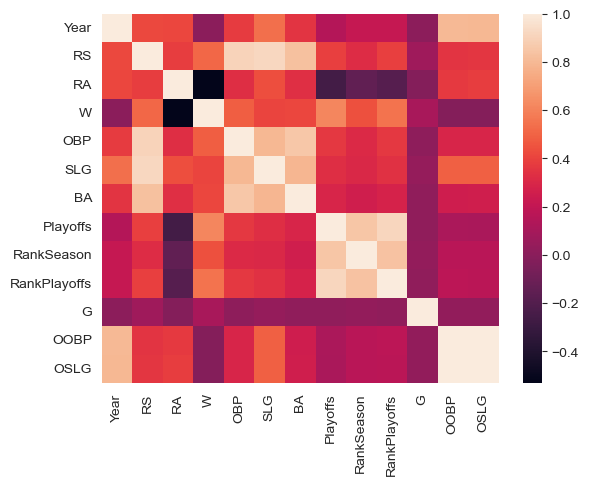

In [109]:
sns.heatmap(df.corr());

In [110]:
df.columns

Index(['Team', 'League', 'Year', 'RS', 'RA', 'W', 'OBP', 'SLG', 'BA',
       'Playoffs', 'RankSeason', 'RankPlayoffs', 'G', 'OOBP', 'OSLG'],
      dtype='object')

In [111]:
df = pd.get_dummies(df, columns=['League','Playoffs','RankSeason'],drop_first=True)
df

,Team,Year,RS,RA,W,OBP,SLG,BA,RankPlayoffs,G,...,League_NL,Playoffs_1,RankSeason_1.0,RankSeason_2.0,RankSeason_3.0,RankSeason_4.0,RankSeason_5.0,RankSeason_6.0,RankSeason_7.0,RankSeason_8.0
0,ARI,2012,734,688,81,0.328,0.418,0.259,0.0,162,...,1,0,0,0,0,0,0,0,0,0
1,ATL,2012,700,600,94,0.320,0.389,0.247,5.0,162,...,1,1,0,0,0,1,0,0,0,0
2,BAL,2012,712,705,93,0.311,0.417,0.247,4.0,162,...,0,1,0,0,0,0,1,0,0,0
3,BOS,2012,734,806,69,0.315,0.415,0.260,0.0,162,...,0,0,0,0,0,0,0,0,0,0
4,CHC,2012,613,759,61,0.302,0.378,0.240,0.0,162,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,PHI,1962,705,759,81,0.330,0.390,0.260,0.0,161,...,1,0,0,0,0,0,0,0,0,0
1228,PIT,1962,706,626,93,0.321,0.394,0.268,0.0,161,...,1,0,0,0,0,0,0,0,0,0
1229,SFG,1962,878,690,103,0.341,0.441,0.278,2.0,165,...,1,1,1,0,0,0,0,0,0,0
1230,STL,1962,774,664,84,0.335,0.394,0.271,0.0,163,...,1,0,0,0,0,0,0,0,0,0


In [112]:
#create data
X = df.drop(columns=['Team'],axis=1) # independent variables
y = df['RankPlayoffs'] # dependent variable

In [113]:
# one-hot encoding for categorical features
#enc = OneHotEncoder(sparse=False,handle_unknown='ignore')
#enc.fit(X)
#X = enc.transform(X)

In [114]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            1232 non-null   int64  
 1   RS              1232 non-null   int64  
 2   RA              1232 non-null   int64  
 3   W               1232 non-null   int64  
 4   OBP             1232 non-null   float64
 5   SLG             1232 non-null   float64
 6   BA              1232 non-null   float64
 7   RankPlayoffs    1232 non-null   float64
 8   G               1232 non-null   int64  
 9   OOBP            1232 non-null   float64
 10  OSLG            1232 non-null   float64
 11  League_NL       1232 non-null   uint8  
 12  Playoffs_1      1232 non-null   uint8  
 13  RankSeason_1.0  1232 non-null   uint8  
 14  RankSeason_2.0  1232 non-null   uint8  
 15  RankSeason_3.0  1232 non-null   uint8  
 16  RankSeason_4.0  1232 non-null   uint8  
 17  RankSeason_5.0  1232 non-null   u

In [115]:
#X = pd.get_dummies(df, columns=['state.name','state.region'], prefix=['state','region'])
#X.head()

In [116]:
# splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create pipeline
regressor = LinearRegression()
scaler = StandardScaler() # or StandardScaler()
selector = SelectKBest(f_regression, k=3)
pipeline = Pipeline([('scaler', scaler), ('selector', selector), ('regressor', regressor)])

In [117]:
#import statsmodels.api as sm
#X_train_lm = sm.add_constant(X_train)

#lr_1 = sm.OLS(y_train, X_train_lm).fit()

#lr_1.summary()

In [118]:
# fit and predict
pipeline.fit(X_train, y_train)
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

# print coefficient of determination R^2 of the prediction
print("Train R^2: ", pipeline.score(X_train, y_train))
print("Test R^2: ", pipeline.score(X_test, y_test))

Train R^2:  0.8288974203155228
Test R^2:  0.8517706923936886


In [119]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred_test))
print(metrics.mean_squared_error(y_test, y_pred_test))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

0.18662116203135637
0.2098617363635325
0.45810668666101406


<AxesSubplot:xlabel='RankPlayoffs', ylabel='Count'>

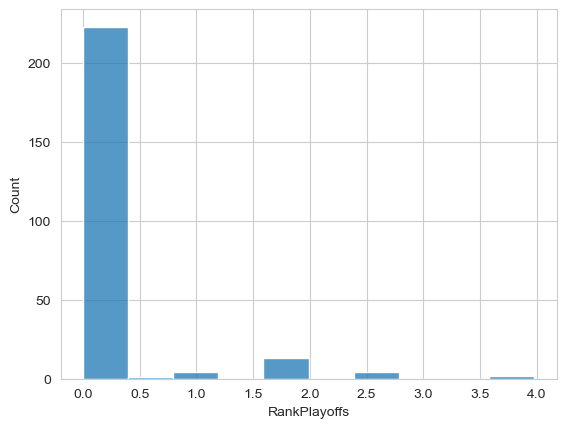

In [120]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Plot the histogram of the error terms
fig = plt.figure()
sns.histplot((y_pred_test - y_test)**2, bins = 10)